In [1]:
setwd("~/WGS//SNPS//12_07/")

In [2]:
fst=read.table("slidingwindow", row.names=NULL, header=TRUE)

In [3]:
head(fst)

row.names,region,chr,midPos,Nsites
"(357,5271)(500,5499)(500,5500)",AAPE02055386,3000,4916,0.098678
"(857,5771)(1000,5999)(1000,6000)",AAPE02055386,3500,4916,0.097179
"(1357,6271)(1500,6499)(1500,6500)",AAPE02055386,4000,4916,0.097014
"(1857,6771)(2000,6999)(2000,7000)",AAPE02055386,4500,4916,0.096539
"(2357,7271)(2500,7499)(2500,7500)",AAPE02055386,5000,4916,0.095201
"(2836,7763)(3000,7999)(3000,8000)",AAPE02055386,5500,4929,0.094678


In [4]:
fst$row.names=NULL

In [5]:
head(fst)

region,chr,midPos,Nsites
AAPE02055386,3000,4916,0.098678
AAPE02055386,3500,4916,0.097179
AAPE02055386,4000,4916,0.097014
AAPE02055386,4500,4916,0.096539
AAPE02055386,5000,4916,0.095201
AAPE02055386,5500,4929,0.094678


In [6]:
colnames(fst)=c("Scaffold","midPos", "Nsites", "FST")

In [7]:
head(fst)

Scaffold,midPos,Nsites,FST
AAPE02055386,3000,4916,0.098678
AAPE02055386,3500,4916,0.097179
AAPE02055386,4000,4916,0.097014
AAPE02055386,4500,4916,0.096539
AAPE02055386,5000,4916,0.095201
AAPE02055386,5500,4929,0.094678


In [8]:
fst$ScaffoldNum=as.numeric(as.factor(fst$Scaffold))

In [9]:
nrow(fst)

[1] 3892511

In [28]:
tail(fst)

,Scaffold,midPos,Nsites,FST,ScaffoldNum
3892506,GL433172,11000,1130,0.123437,11652
3892507,GL433172,11500,630,0.154347,11652
3892508,GL433172,12000,130,0.128494,11652
3892509,GL433172,14500,289,0.043607,11652
3892510,GL433172,15000,780,0.116784,11652
3892511,GL433173,3000,2817,0.086459,11653


Try just plotting high FST values

In [14]:
fstHigh=fst[fst$FST>=0.16,]

In [21]:
HighScaf=unique(droplevels(fstHigh$Scaffold))

In [22]:
HighScaf

[1] AAPE02059158 AAPE02063868 AAPE02070517 AAPE02072785 GL429767    
 [6] GL429768     GL429771     GL429779     GL429783     GL429799    
[11] GL429854     GL429858     GL429864     GL429871     GL429873    
[16] GL429909     GL429956     GL430077     GL430103     GL430134    
[21] GL430361     GL430434     GL430496     GL430625     GL430810    
[26] GL430910     GL430934     GL430970     GL431256     GL431379    
[31] GL432554     GL432816    
32 Levels: AAPE02059158 AAPE02063868 AAPE02070517 AAPE02072785 ... GL432816

In [23]:
fstHighScaf=fst[fst$Scaffold %in% HighScaf,]

In [25]:
nrow(fstHighScaf)

[1] 399812

In [35]:
HighScaf=as.vector(as.character(HighScaf))

In [26]:
require(ggplot2)

Loading required package: ggplot2


In [29]:
fstHighScaf$ScaffoldNum2=as.numeric(as.factor(fstHighScaf$ScaffoldNum))

In [31]:
head(fstHighScaf)

,Scaffold,midPos,Nsites,FST,ScaffoldNum,ScaffoldNum2
6908,AAPE02059158,3000,4553,0.080216,54,1
6909,AAPE02059158,3500,4553,0.152081,54,1
6910,AAPE02059158,4000,4575,0.151621,54,1
6911,AAPE02059158,4500,4575,0.152094,54,1
6912,AAPE02059158,5000,4575,0.154759,54,1
6913,AAPE02059158,5500,4575,0.158541,54,1


In [33]:
require(qqman)

Loading required package: qqman

For example usage please run: vignette('qqman')

Citation appreciated but not required:
Turner, S.D. qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. biorXiv DOI: 10.1101/005165 (2014).



In [ ]:
plot=manhattan(fstHighScaf, chr = "midPos", bp = "Nsites", p = "FST", 
col = c("gray10", "gray60"), chrlabs = HighScaf, logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST")

Warning message in manhattan(fstHighScaf, chr = "midPos", bp = "Nsites", p = "FST", :
“No SNP column found. OK unless you're trying to highlight.”

Warning message in manhattan(subset(fstHighScaf, ScaffoldNum2 == 5), chr = "ScaffoldNum2", :
“No SNP column found. OK unless you're trying to highlight.”

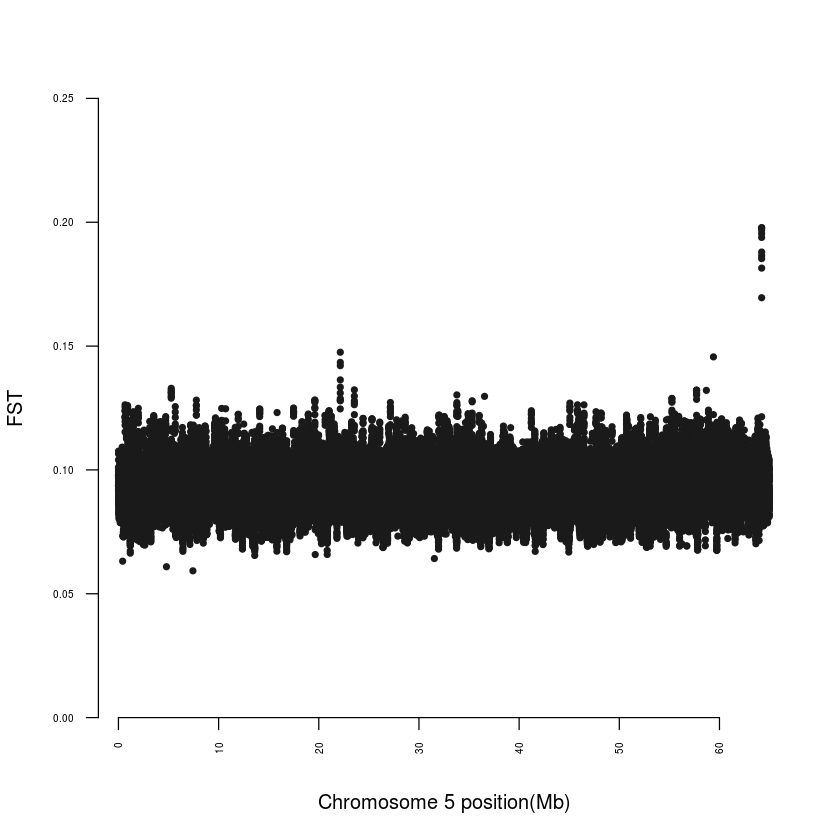

In [52]:
plot=manhattan(subset(fstHighScaf, ScaffoldNum2==5), chr = "ScaffoldNum2", bp = "midPos", p = "FST",  
col = c("gray10", "gray60"), logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST")

In [ ]:
plot=manhattan(fst, chr = "ScaffoldNum", bp = "midPos", p = "FST", 
col = c("gray10", "gray60"), chrlabs = NULL)

Warning message in manhattan(fst, chr = "ScaffoldNum", bp = "midPos", p = "FST", :
“No SNP column found. OK unless you're trying to highlight.”

In [ ]:
plot=ggplot(data=fstHigh, aes(x=midPos, y=FST))+
  geom_point(data=fstHigh)+
  theme_bw()+ facet_grid(.~ScaffoldNum)

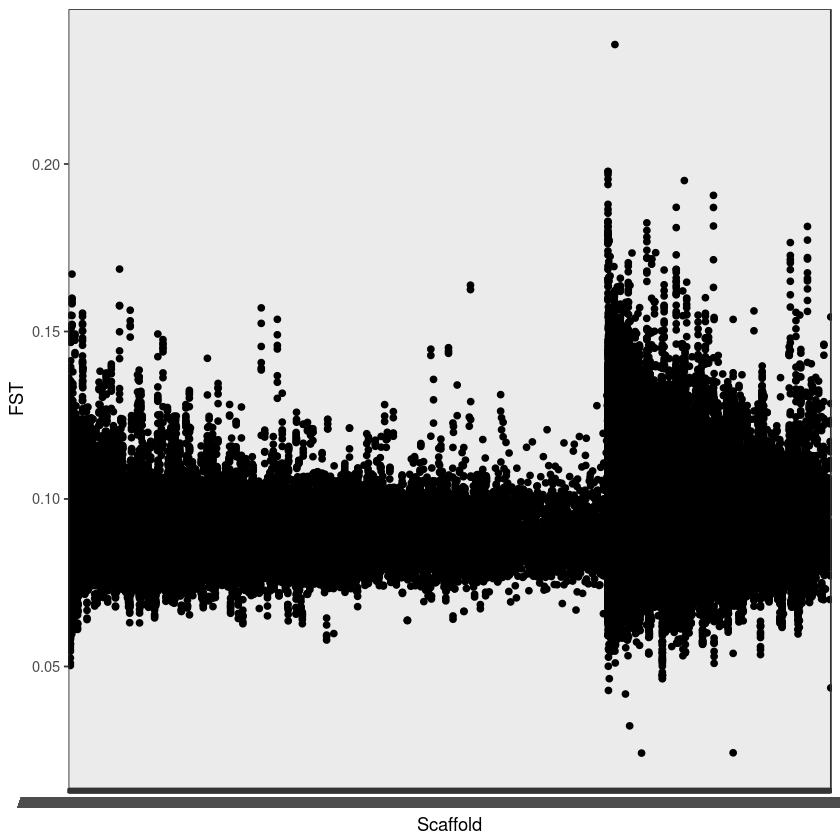

In [16]:
##plot of fst by scaffold